## 1. Setup and Load Data

In [90]:
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import os
import cv2

In [91]:
# To avoid OOM errors by setting GPU Memory Consumption Growth
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [92]:
data_dir="C:\\Users\\Gladys\\Notebooks\\Finches"

In [93]:
image_exts=['jpeg','jpg','bmp','png']

In [94]:
os.listdir(data_dir)

['GouldianFinches', 'ZebraFinches']

In [95]:
def is_image_file(Finches):
    """Check if a file has an allowed image extension."""
    _, file_extension = os.path.splitext(Finches)
    return file_extension.lower() in image_exts

# Iterate through files in the directory
for Finches in os.listdir(data_dir):
    file_path = os.path.join(data_dir, Finches)
    
    if os.path.isfile(file_path) and not is_image_file(Finches):
        # If the file is not an allowed image, delete it
        os.remove(file_path)
        print(f"Removed: {Finches}")

print("Image files with allowed extensions are retained; others have been removed.")
        

Image files with allowed extensions are retained; others have been removed.


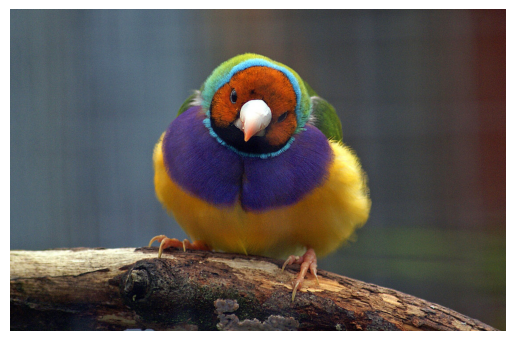

<Figure size 2000x2000 with 0 Axes>

In [96]:
# Define the image file path
image_path = "C:\\Users\\Gladys\\Notebooks\\Finches\\GouldianFinches\\8065423804_f2575fd58b_b.jpg"

# Read the image using OpenCV
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is not None:
    # OpenCV reads images in BGR format, so you may need to convert to RGB for Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide the axis
    plt.figure(figsize=(20,20))
    plt.show()
else:
    print("Failed to load the image.")

In [97]:
tf.keras.utils.image_datset_from_directory??


Object `tf.keras.utils.image_datset_from_directory` not found.


In [98]:
data=tf.keras.utils.image_dataset_from_directory("C:\\Users\\Gladys\\Notebooks\\Finches")

Found 91 files belonging to 2 classes.


In [99]:
data_iterator=data.as_numpy_iterator()

In [100]:
# Get another batch
batch=data_iterator.next()

In [101]:
len(batch)

2

In [102]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [103]:
batch[1]

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

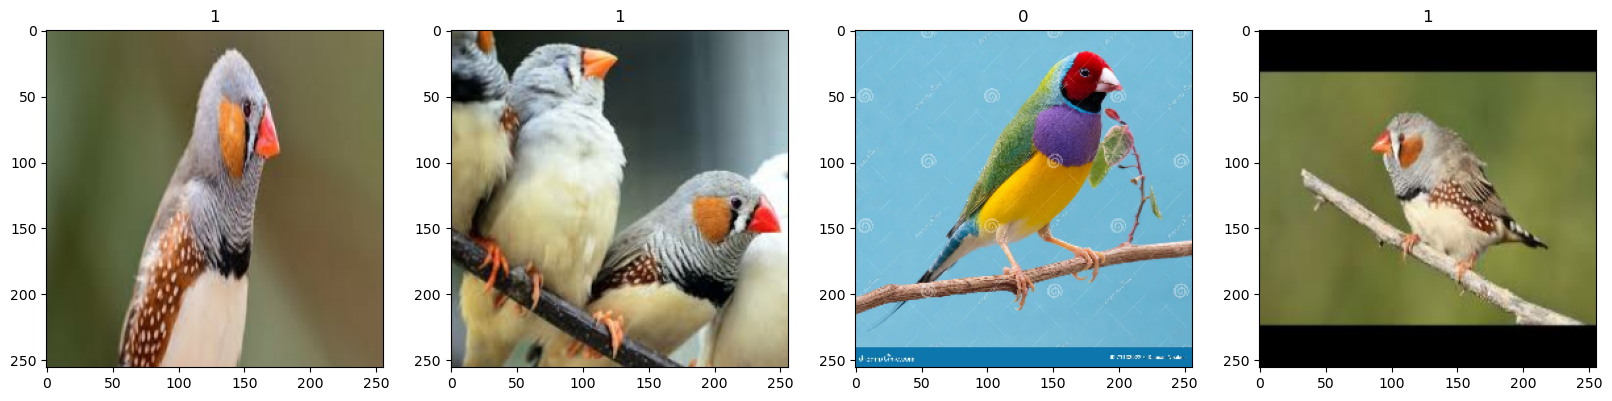

In [104]:
# To find which class 0 and 1 flags belong to
# 0 is Gouldian Finches class and 1 is Zebra Finches class
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 2. Preprocess Data

In [105]:
# Scale Data
data=data.map(lambda x,y:(x/255.0,y))

In [106]:
scaled_iterator=data.as_numpy_iterator()

In [107]:
batch=scaled_iterator.next()

In [108]:
batch[0].max()

1.0

In [109]:
sclaed_iterator=data.as_numpy_iterator()

In [110]:
batch=scaled_iterator.next()

In [111]:
batch[0].max()

1.0

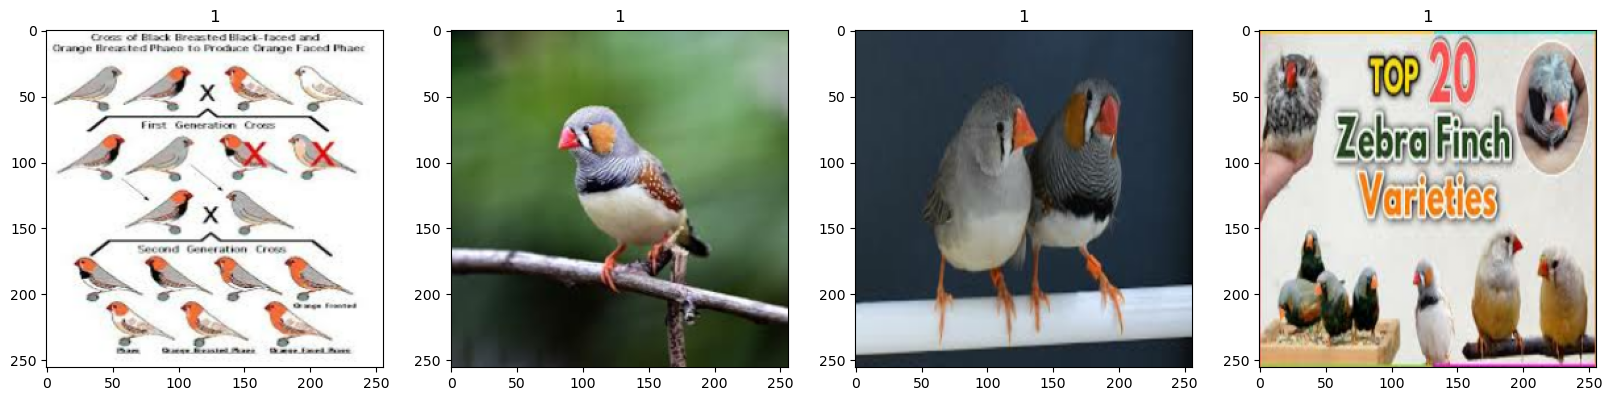

In [112]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## Split Data

In [113]:
len(data)

3

In [118]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [123]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

## 3.Building deep learning model

### 3.1 Building the model

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout

In [125]:
model=Sequential()

In [126]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [127]:
# Compile
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [128]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### 3.2 Train

In [130]:
logdir="C:\\Users\\Gladys\\Notebooks\\logs"

In [131]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [133]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 5s 2s/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 2/20
2/2 [==============================] - 2s 1s/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 3/20
2/2 [==============================] - 2s 991ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 4/20
2/2 [==============================] - 2s 1s/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 5/20
2/2 [==============================] - 2s 1s/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 6/20
2/2 [==============================] - 2s 1s/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 7/20
2/2 [==============================] - 2s 1s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 8/20
2/2 [======================

In [134]:
hist.history

{'loss': [0.010532618500292301,
  0.01102481596171856,
  0.008823743090033531,
  0.0037801768630743027,
  0.0037095469888299704,
  0.0043096644803881645,
  0.0015807927120476961,
  0.0018406689632683992,
  0.002511544618755579,
  0.0018725236877799034,
  0.0008796053007245064,
  0.0006298051448538899,
  0.0009859622223302722,
  0.0008786132675595582,
  0.0006812862120568752,
  0.0007711679209023714,
  0.0003727311559487134,
  0.00030967811471782625,
  0.0004989550216123462,
  0.00040331744821742177],
 'accuracy': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.009408761747181416,
  0.007284191902726889,
  0.0074105653911828995,
  0.004158172756433487,
  0.0013466376112774014,
  0.002185107208788395,
  0.0012481511803343892,
  0.001894017099402845,
  0.0006465311744250357,
  0.0006288360455073416,
  0.00033115348196588457,
  0.0017033594194799662,
  0.0002185019984608516,
  0.0007

<function matplotlib.pyplot.show(close=None, block=None)>

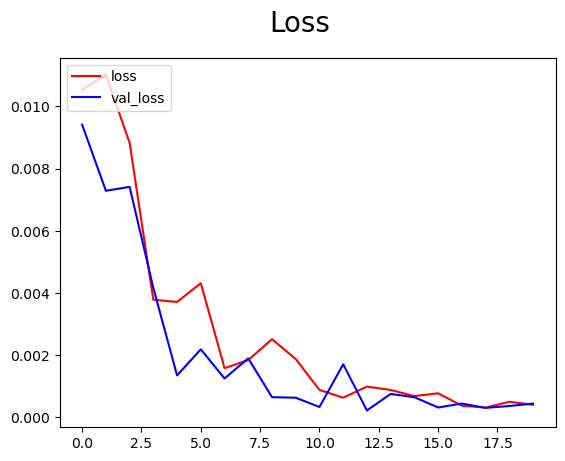

In [136]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='red',label='loss')
plt.plot(hist.history['val_loss'],color='blue',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

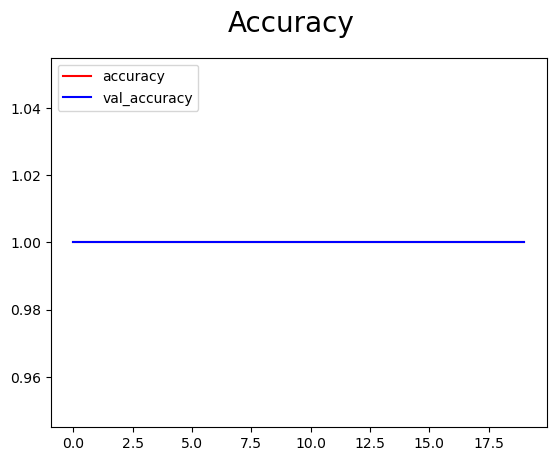

In [137]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='red',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='blue',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show

## 4 Evaluate performance

### 4.1 Evaluate

In [138]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [139]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [142]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

In [145]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:0.0,Recall:0.0,Accuracy:0.0


### 4.2 Test

<function matplotlib.pyplot.show(close=None, block=None)>

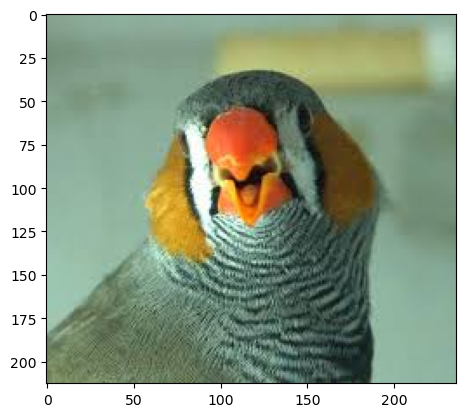

In [148]:
# Zebra Finch Test
img=cv2.imread("C:\\Users\\Gladys\\Notebooks\\ZebraFinchTest\\ZebraFinchTest.jpg.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

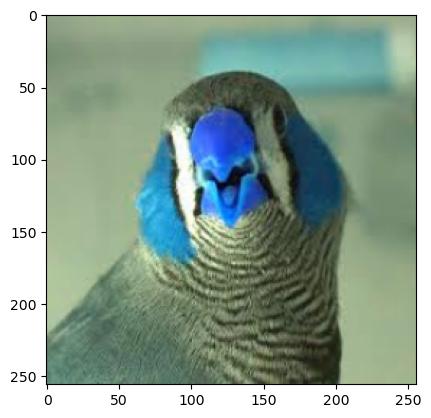

In [150]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [152]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [154]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 36ms/step


array([[0.99429494]], dtype=float32)

In [155]:
yhat

array([[0.99429494]], dtype=float32)

In [156]:
if yhat>0.5:
    print(f'predicted class is Zebra Finches')
else:
    print(f'predicted class is Gouldian Finches')

predicted class is Zebra Finches


<function matplotlib.pyplot.show(close=None, block=None)>

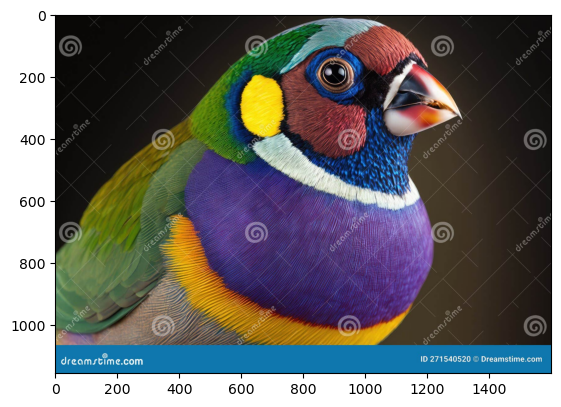

In [157]:
# Gouldian Finch test
img=cv2.imread("C:\\Users\\Gladys\\Notebooks\\GouldianFichTest\\GoudianFinchTest.jpg.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

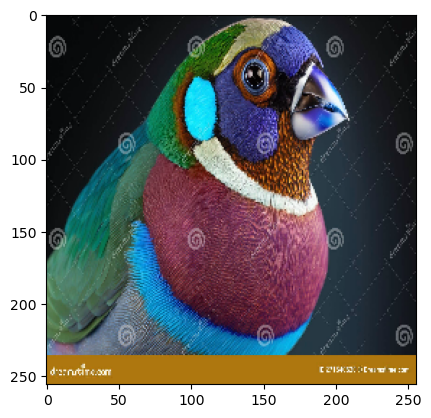

In [158]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [159]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [160]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 54ms/step


In [161]:
yhat

array([[0.65236676]], dtype=float32)

In [164]:
if yhat>0.7:
    print(f'predicted class is Zebra Finches')
else:
    print(f'predicted class is Gouldian Finches')

predicted class is Gouldian Finches
